<a href="https://colab.research.google.com/github/ultralegendshubh/House_price_prediction/blob/main/My_Project_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all important library
1) Pandas for data processing 
2) Numpy for linear algebra 
3) Matplotlib and Seaborn for data visualization 

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


## Import google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data from colab in csv format

df_train = pd.read_csv("/content/drive/MyDrive/Data Fie/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Data Fie/test.csv")

# Exploratory data analysis

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape


(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
##find duplicate rows in train and test

df_train.duplicated().sum()
df_test.duplicated().sum()

0

In [ ]:
# these three variables are categorical data encoded
df_train[['MSSubClass', 'OverallQual', 'OverallCond']] = df_train[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df_test[['MSSubClass', 'OverallQual', 'OverallCond']] = df_test[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [ ]:
## missing values check in train and test

df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
##check missing values in train and test in percentage and rank them in descending order
(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [ ]:
(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100).head(10)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
dtype: float64

In [ ]:
#There is more than 80% null value, we will drop this column 

df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)



In [ ]:
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [ ]:
(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100).head(25)


LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
PavedDrive        0.000000
WoodDeckSF        0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
SaleCondition     0.000000
BedroomAbvGr      0.000000
SaleType          0.000000
dtype: float64

In [ ]:
(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100).head(50)

LotFrontage      15.558602
GarageYrBlt       5.346127
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtQual          3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrType        1.096642
MasVnrArea        1.028101
MSZoning          0.274160
Utilities         0.137080
Functional        0.137080
BsmtHalfBath      0.137080
BsmtFullBath      0.137080
Exterior2nd       0.068540
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
KitchenQual       0.068540
TotalBsmtSF       0.068540
Exterior1st       0.068540
GarageArea        0.068540
SaleType          0.068540
GarageCars        0.068540
MoSold            0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
YrSold            0.000000
TotRmsAbvGrd      0.000000
GrLivArea         0.000000
MiscVal           0.000000
S

# Fill missing values

In [ ]:
# Fill missing values

df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])




In [ ]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])


In [ ]:
(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100).head(10)

MSZoning        0.27416
BsmtHalfBath    0.13708
BsmtFullBath    0.13708
Functional      0.13708
Utilities       0.13708
Exterior1st     0.06854
KitchenQual     0.06854
GarageCars      0.06854
GarageArea      0.06854
BsmtFinSF1      0.06854
dtype: float64

In [ ]:
(df_train.isnull().sum().sort_values(ascending=False)/len(df_test)*100).head(10)

Electrical      0.06854
Id              0.00000
FullBath        0.00000
Fireplaces      0.00000
Functional      0.00000
TotRmsAbvGrd    0.00000
KitchenQual     0.00000
KitchenAbvGr    0.00000
BedroomAbvGr    0.00000
HalfBath        0.00000
dtype: float64

In [ ]:
df_train.shape

(1460, 76)

In [ ]:
df_test.shape

(1459, 75)

In [ ]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [ ]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
#Check again null values

(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100).head(10)

MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
dtype: float64

In [ ]:
(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100).head(10)

MSSubClass      0.0
GarageType      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [ ]:
df_train.shape

(1459, 75)

In [ ]:
df_test.shape

(1447, 74)

##Handle Categorical Features

In [ ]:
columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

38

In [ ]:
copy_train = df_train.copy

In [ ]:
copy_test= df_test.copy

In [ ]:
total= pd.concat([df_train.drop(['SalePrice'],axis=1),df_test]
,axis=0)

## func to convert into one hot encoder form

In [ ]:

def category_onehot_multcols(multcolumns):
    df_final=total
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(total[fields],drop_first=True)
        
        total.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([total,df_final],axis=1)
        
    return df_final

In [ ]:
## passing our total Dataframe for one hot encoder
total=category_onehot_multcols(columns)
save_cols=total.columns

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
total.isna().sum()

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
              ..
Gd             0
Po             0
TA             0
P              0
Y              0
Length: 232, dtype: int64

#from sklearn.preprocessing import StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
x = total.values
x = StandardScaler().fit_transform(x)
x=pd.DataFrame(x,columns=save_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = total.values
x = StandardScaler().fit_transform(x)
x=pd.DataFrame(x,columns=save_cols)

# splitting scaled total data into train and test data
train = x.iloc[:1460]
test = x.iloc[1460:]
# getting predicting values i.e SalePrice into "y" and scaling it .. 
# separately 
y = df_train['SalePrice'].values
sc=StandardScaler()
y = pd.DataFrame(sc.fit_transform(y.reshape(-1,1)))
y.columns=['SalePrice']
train = pd.concat([train,y],axis=1)

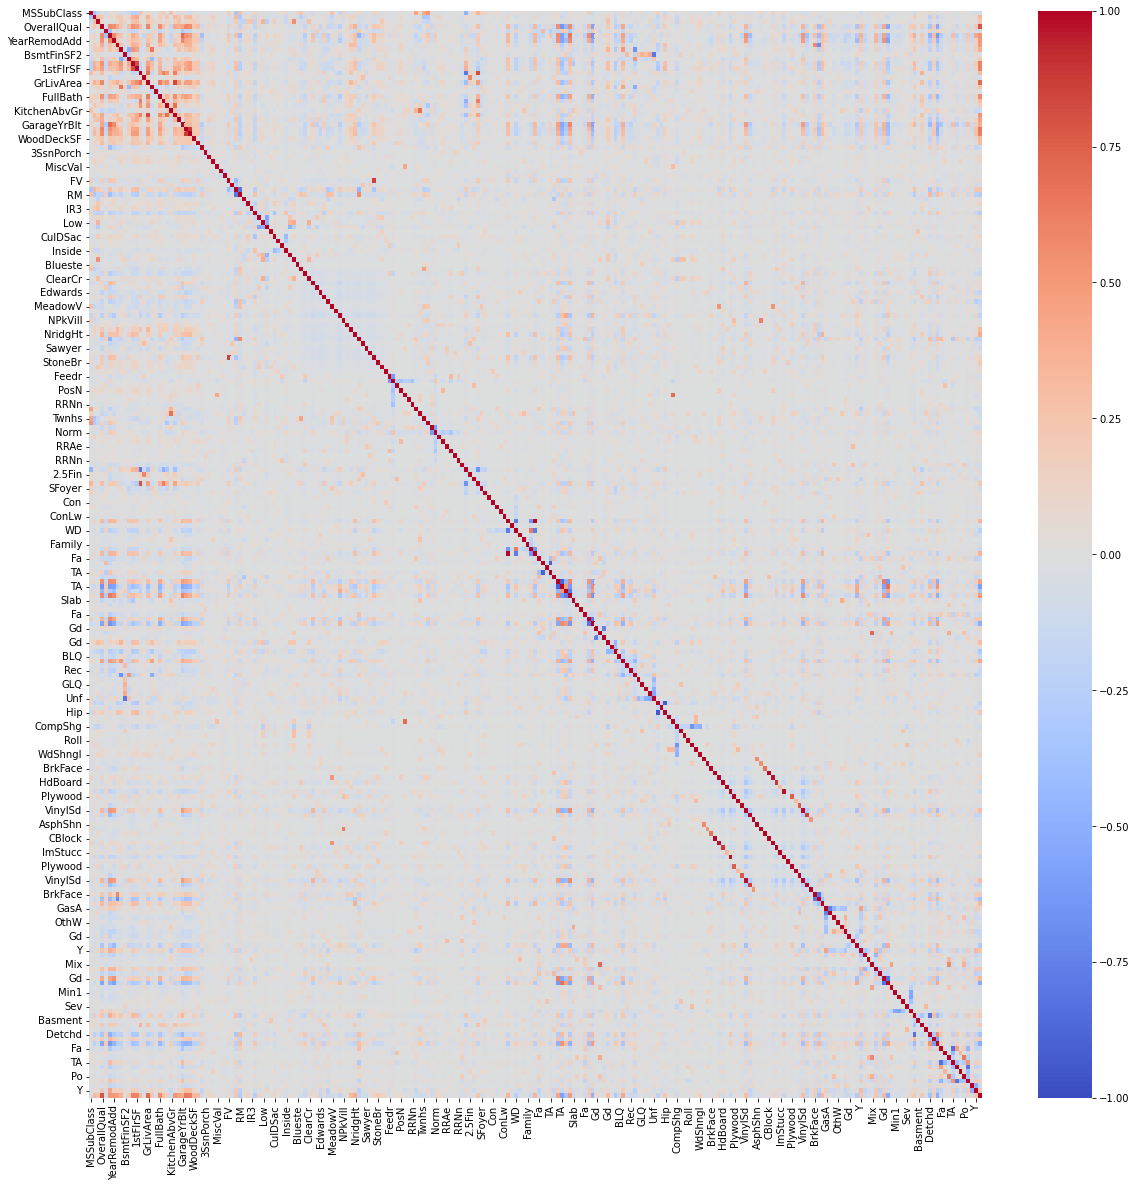

In [ ]:

import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm

corr = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=-1,vmax=1,cmap='coolwarm')

In [ ]:
train.corr().reset_index()[['index','SalePrice']]

,index,SalePrice
0,MSSubClass,-0.084230
1,LotFrontage,0.334922
2,LotArea,0.263837
3,OverallQual,0.791069
4,OverallCond,-0.077924
...,...,...
228,Po,-0.063305
229,TA,0.136012
230,P,-0.088641
231,Y,0.232012


In [ ]:

interested_col=[]

for item in train.corr().reset_index()[['index','SalePrice']].values:
    if item[1:2]>=0.15 or item[1:2]<=-0.15:
        interested_col.append(item[0:1][0])

interested_col.remove('SalePrice')
columns=interested_col
print(interested_col)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'RL', 'RM', 'Reg', 'Edwards', 'IDOTRR', 'NAmes', 'NoRidge', 'NridgHt', 'OldTown', 'StoneBr', '2Story', 'New', 'WD', 'Normal', 'Partial', 'Gd', 'TA', 'CBlock', 'PConc', 'Gd', 'TA', 'Gd', 'No', 'GLQ', 'Gable', 'Hip', 'WdShngl', 'MetalSd', 'VinylSd', 'Wd Sdng', 'MetalSd', 'VinylSd', 'Wd Sdng', 'BrkFace', 'None', 'Stone', 'TA', 'Y', 'SBrkr', 'Fa', 'Gd', 'TA', 'Attchd', 'BuiltIn', 'Detchd', 'RFn', 'Unf', 'Y']


#The lists of Algorithms i used:

1) Gradient Boosting Algorithm 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
# Initialising the ANN
classifier = Sequential()
# Adding dropout layer
classifier.add(Dropout(0.2))
# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform', activation='relu',input_dim = 146))
# Adding the second hidden layer
classifier.add(Dense(25, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the third hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform', use_bias=True))
# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')
# Fitting the ANN to the Training set
model_history=classifier.fit(train.values, y.values,validation_split=0.20, batch_size = 10, epochs = 760)

Epoch 1/760
108/117 [==========================>...] - ETA: 0s - loss: 0.7358

ValueError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
regressor = GradientBoostingRegressor(
    max_depth=10,
    n_estimators=500,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)
errors = [root_mean_squared_error(y_train, y_pred) for y_pred in regressor.staged_predict(X_train)]
best_n_estimators = np.argmin(errors)
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

NameError: ignored